# INDASV Statistical Summary

This notebook contains a collection of statistical summary of the Bibleis INDASV, a total of 4.8GB in size (1189 audio files). This summary is created based on the `statistical_summary.csv` generated by the `Summarizer` (please refer to `gurih.data.summarizer` for more info about `Summarizer`)

## Summarizer Output Data

### Library and Data Import

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("statistical_summary.csv", index_col=0)

The generated data (`statistical_summary.csv`) consists of 11 columns, namely:
* `id_name` : name of the audio files and the corresponding transcript (`str`)
* `audio_duration` : length of the audio duration (`float`)
* `transcript` : transcript for the corresponding audio (`str`)
* `transcript_length` : character count of the transcript (`int`)
* `total_comma` : number of commas occuring in the transcript, space included (`int`)

These columns are done in character level
* `split_by_comma_length` : list of the lengths of characters split by comma, space included (`list`)
* `max_split_by_comma_length` : maximum length of the characters in the transcript if split by comma (`int`)
* `min_split_by_comma_length` : minimum length of the characters in the transcript if split by comma (`int`)

These columns are done in word level
* `split_by_comma_wlength` : list of the lengths of words split by comma, space included (`list`)
* `max_split_by_comma_wlength` : maximum length of the words in the transcript if split by comma (`int`)
* `min_split_by_comma_wlength` : minimum length of the words in the transcript if split by comma (`int`)

In [4]:
df.head()

id_name  audio_duration  \
0  INDASV_1CH_1_000          22.750   
1  INDASV_1CH_1_001          13.210   
2  INDASV_1CH_1_002          10.170   
3  INDASV_1CH_1_003          11.535   
4  INDASV_1CH_1_004           9.185   

                                          transcript  transcript_length  \
0  adam, set, enos, kenan, mahalaleel, yared, hen...                 94   
1  keturunan yafet ialah gomer, magog, madai, yaw...                 74   
2  keturunan gomer ialah askenas, difat dan togarma.                 49   
3  keturunan yawan ialah elisa, tarsis, orang kit...                 67   
4  keturunan ham ialah kush, misraim, put dan kan...                 50   

   total_comma                    split_by_comma_length  \
0           11  [4, 4, 5, 6, 11, 6, 7, 10, 7, 4, 4, 15]   
1            5                     [27, 6, 6, 6, 6, 18]   
2            1                                 [29, 19]   
3            2                              [27, 7, 31]   
4            2                              [24, 8, 16]   

   max_split_by_comma_length  min_split_by_comma_length  \
0                         15                          4   
1                         27                          6   
2                         29                         19   
3                         31                          7   
4                         24                          8   

                 split_by_comma_wlength  max_split_by_comma_wlength  \
0  [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4]                           4   
1                    [4, 2, 2, 2, 2, 4]                           4   
2                                [4, 4]                           4   
3                             [4, 2, 6]                           6   
4                             [4, 2, 4]                           4   

   min_split_by_comma_wlength  
0                           1  
1                           2  
2                           4  
3                           2  
4                           2

Get the basic statistical summary for all of the columns

In [6]:
df.describe()

audio_duration  transcript_length   total_comma  \
count    25157.000000       25157.000000  25157.000000   
mean        20.035205         179.777080      2.185435   
std         17.495124         148.009376      2.541764   
min          0.000000           5.000000      0.000000   
25%         10.135000          89.000000      1.000000   
50%         15.385000         137.000000      2.000000   
75%         24.115000         216.000000      3.000000   
max        603.575000        2149.000000     79.000000   

       max_split_by_comma_length  min_split_by_comma_length  \
count               25157.000000               25157.000000   
mean                   89.625512                  41.965974   
std                    52.273791                  36.949089   
min                     5.000000                   0.000000   
25%                    54.000000                  18.000000   
50%                    77.000000                  32.000000   
75%                   111.000000                  52.000000   
max                   703.000000                 703.000000   

       max_split_by_comma_wlength  min_split_by_comma_wlength  
count                25157.000000                25157.000000  
mean                    14.103788                    6.838494  
std                      7.999652                    5.479674  
min                      1.000000                    1.000000  
25%                      9.000000                    3.000000  
50%                     12.000000                    5.000000  
75%                     17.000000                    8.000000  
max                    115.000000                  115.000000

Summarizing the table above, we get this information:

#### Audio Duration

a 0s `audio_duration` occured in the alignment (this may also affect the split) and the maximum `audio duration` is at around 604s which is 10 minutes long.

In [31]:
df[df["audio_duration"] == 0]

22732    INDASV_PSA_144_000
23792     INDASV_PSA_86_000
Name: id_name, dtype: object

In [10]:
df[df["audio_duration"] == 603.575]

id_name  audio_duration  \
13406  INDASV_ISA_59_000         603.575   

                                              transcript  transcript_length  \
13406  adapun aku, inilah perjanjian ku dengan mereka...                266   

       total_comma  split_by_comma_length  max_split_by_comma_length  \
13406            4  [10, 35, 167, 36, 14]                        167   

       min_split_by_comma_length split_by_comma_wlength  \
13406                         10       [2, 6, 26, 6, 3]   

       max_split_by_comma_wlength  min_split_by_comma_wlength  
13406                          26                           2

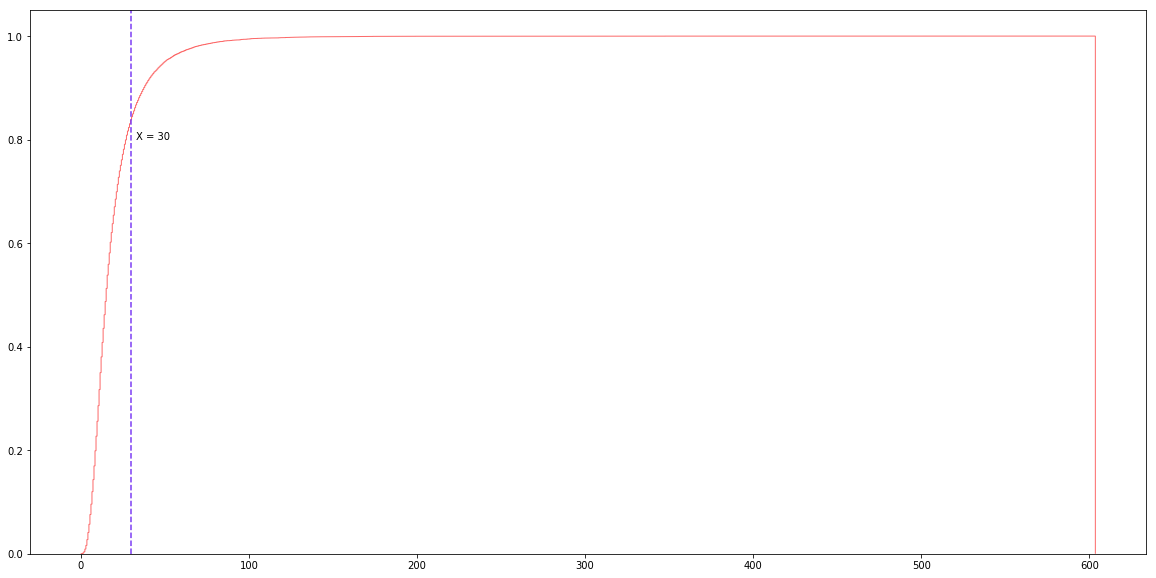

In [66]:
UPPER_LIMIT = 30

plt.figure(figsize=(20,10)) 
plt.hist(df["audio_duration"], cumulative=True, density=1, histtype='step', bins=1000, color="#fc6a6a")
plt.axvline(x=UPPER_LIMIT, color="#7b3af4", linestyle="--")
plt.text(UPPER_LIMIT+3, 0.8, "X = 30")
plt.show()

Looking at the distrbution of the `audio_duration` we can see that there is an outlier located in the right tail (which is the maximum value mentioned above)

In [24]:
df[df["audio_duration"] > 60].shape[0]

773

Fortunately, only 773 of audio files (3% of the total) are longer than 1 minute

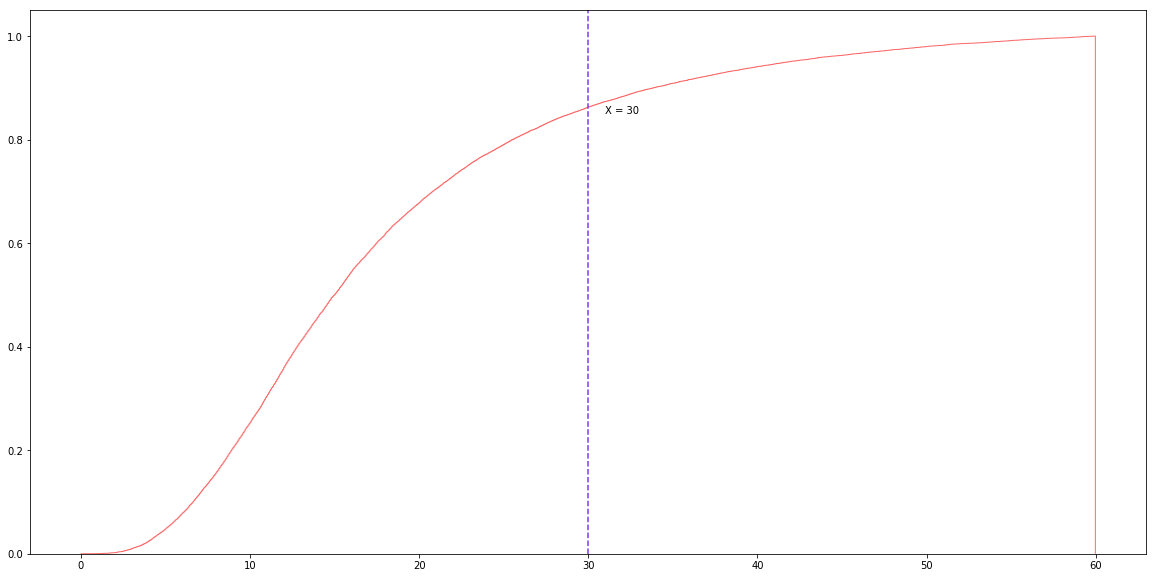

In [71]:
plt.figure(figsize=(20,10)) 

plt.hist(df[df["audio_duration"] < 60]["audio_duration"], cumulative=True, density=1, histtype='step', bins=1000, color="#fc6a6a")

plt.axvline(x=UPPER_LIMIT, color="#7b3af4", linestyle="--")
plt.text(UPPER_LIMIT+1, 0.85, "X = 30")
plt.show()

Looking at the distribution for `audio_duration` < 1 minute, we can see that majority of the audio files have `audio_duration` < 30 and it accounts for almost more than 80% of the available data.

#### Transcription Length

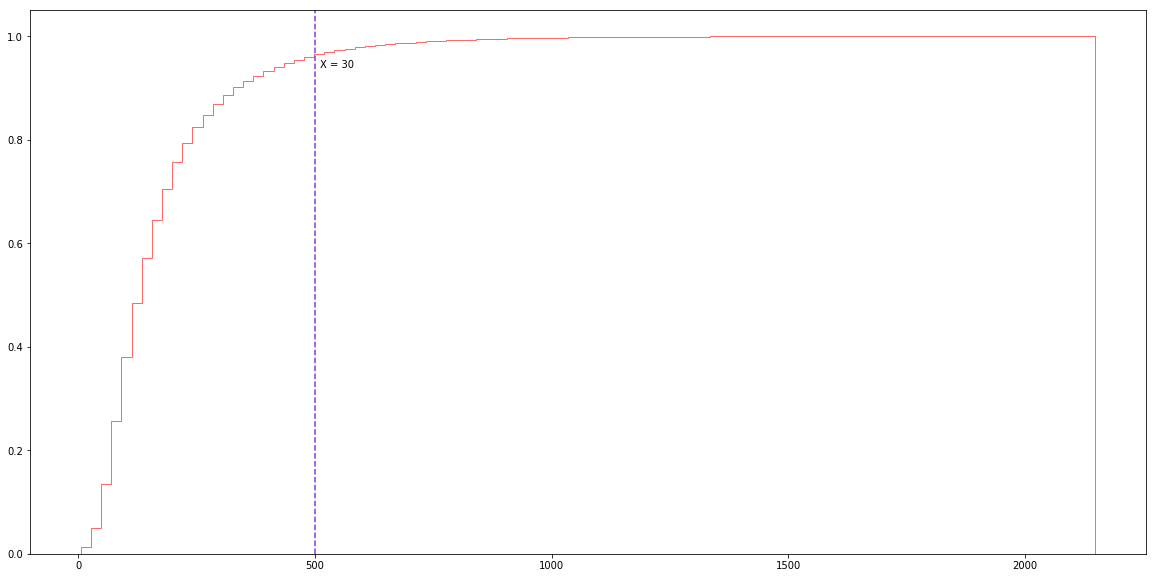

In [84]:
UPPER_LIMIT = 500

plt.figure(figsize=(20,10)) 
plt.hist(df["transcript_length"], histtype='step', cumulative=True, density=1, color="#fc6a6a", bins=100)

plt.axvline(x=UPPER_LIMIT, color="#7b3af4", linestyle="--")
plt.text(UPPER_LIMIT+10, 0.94, "X = 30")
plt.show()

Looking at the distribution, we can see that majority of the audio files have `transcript_length` < 500 and it accounts for almost more than 95% of the available data.

#### Word-Audio Duration Ratio

#### Word Split by Comma Distribution

In [95]:
from ast import literal_eval

df["split_by_comma_wlength"] = df["split_by_comma_wlength"].apply(lambda x : np.array(literal_eval(x)))

In [108]:
df["split_by_comma_wlength"] = df["split_by_comma_wlength"].apply(lambda x : list(x))

In [116]:
split_by_comma_wlenghts = df["split_by_comma_wlength"].tolist()
split_by_comma_wlenghts = [wc for l in split_by_comma_wlenghts for wc in l]

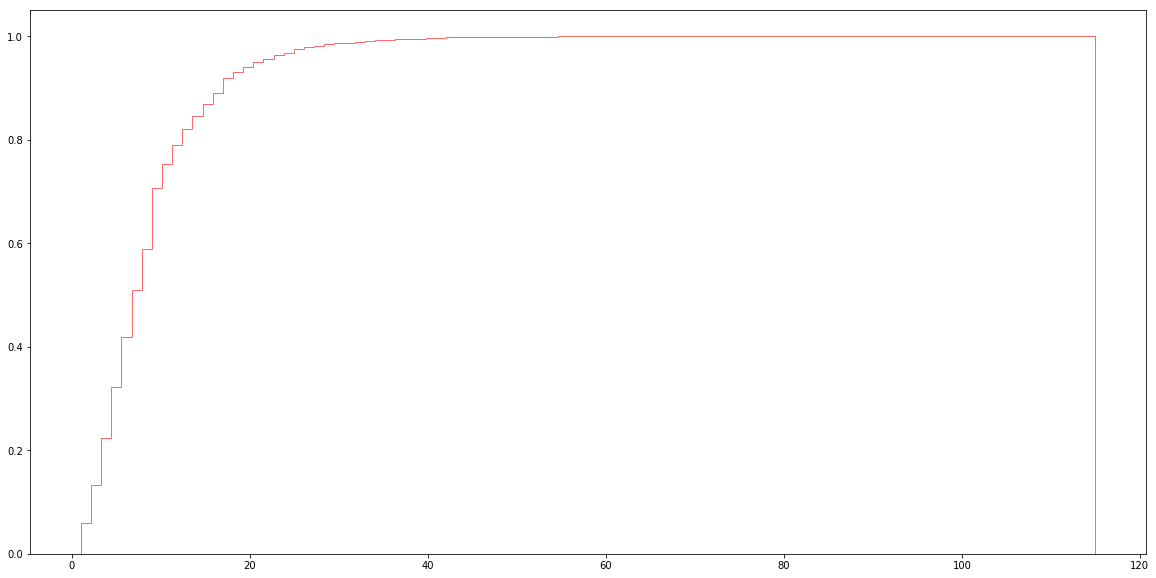

In [119]:
plt.figure(figsize=(20,10)) 
plt.hist(split_by_comma_wlenghts, histtype='step', cumulative=True, density=1, color="#fc6a6a", bins=100)

# plt.axvline(x=UPPER_LIMIT, color="#7b3af4", linestyle="--")
# plt.text(UPPER_LIMIT+10, 0.94, "X = 30")
plt.show()

In [121]:
df[df["split_by_comma_wlength"].apply(lambda x: 115 in x)]

id_name  audio_duration  \
396  INDASV_1CH_24_007           107.5   

                                            transcript  transcript_length  \
396  undian yang pertama jatuh pada yoyarib yang ke...                703   

     total_comma split_by_comma_length  max_split_by_comma_length  \
396            0                 [703]                        703   

     min_split_by_comma_length split_by_comma_wlength  \
396                        703                  [115]   

     max_split_by_comma_wlength  min_split_by_comma_wlength  
396                         115                         115

## Raw Data

### Data Import

In [94]:
import pandas as pd
import re
import matplotlib.pyplot as plt

df = pd.read_csv("bibleis_trimmed.csv")

### Data Preprocessing

#### Split By Symbols

The intuition behind this is to create cleaner transcriptions and divide the transcriptions by symbols that have possibility to create a pause between each word, for this purpose, the following symbols were used `?`, `;`, `:`, `!`. `,` (comma) and `.` (dot) were also used to divide the transcription and since both of them are going to be predicted by the model `[COMMA]` and `[DOT]` sign were used as a way to replace the real symbols so it won't get deleted. Also during the cleaning process these unicode symbols `-`, `—`, `"` were also removed since they're not really used for the voice recognizer. 

In [224]:
def split_by_symbols(string):
    """
    
    """
    string = string.lower()
    
    # Replace the pause symbol with new line symbol, this is done to ease the
    pause_symbols = ["?\"\n\n", ";\n\n", ":\n\n", "?\n\n", "!\n\n", "\"\n\n", ";", ":", "?"]
    for pause_symbol in pause_symbols:
        string = string.replace(pause_symbol, "\n")
    
    # Replace the junk symbols with empty whitespace
    junk_symbols = ["-", "—"]
    for junk_symbol in junk_symbols:
        string = string.replace(junk_symbol, " ")
        
    # Replace with possible combinations of comma, dot and newline
    dot_comma_dict = {".": "[DOT]", ",": "[COMMA]"}
    for k, v in dot_comma_dict.items():
        for newline in ["\n\n", "\n", " "]:
            string = string.replace(f"{k}{newline}", f"{v}\n")
            
    string = string.replace("\"", "").split("\n")
    string = [s.strip() for s in string]
    
    return string

#### Fix String Length

This part is the continuation of the previous preprocessing process. During this part the length of the strings will be fixed so they don't differ that far from each other. The reason behind the creation of this is the fact that if the word/char length is so different/so far from each other, the one with the shortest string will get unnecessary padding. For this purpose two method is proposed: 
1. **Constant Fix String Length** - In constant fix string length the string will be appended by the succeeding string until it reaches a length greater than the `lower_bound`
2. **Smart Fix String Length**

In [232]:
def fix_string_length(sentences, lower_bound=10):
    new_sentences = []
    i = 0
    while i < len(sentences) - 1:
        new_sentence = []
        while len(new_sentence) < lower_bound:
            next_sentence = sentences[i].split(" ")
            
            if next_sentence != [""]:
                new_sentence += next_sentence
            
            if i < len(sentences) - 1:
                i += 1
            else:
                break
                
        new_sentences.append(" ".join(new_sentence))
    return new_sentences
    

In [286]:
for i in range(len(df["chapter_string"])):
    tmp = split_by_delimiters(df["chapter_string"][i])
    print(i)
    tmp = smart_fix_string_length(tmp)

0
[]
['orang', 'filistin', 'berperang', 'melawan', 'orang', 'israel[DOT]']
['orang', 'orang', 'israel', 'melarikan', 'diri', 'dari', 'hadapan', 'orang', 'filistin', 'dan', 'banyak', 'yang', 'mati', 'terbunuh', 'di', 'pegunungan', 'gilboa[DOT]']
[]
['orang', 'orang', 'israel', 'melarikan', 'diri', 'dari', 'hadapan', 'orang', 'filistin', 'dan', 'banyak', 'yang', 'mati', 'terbunuh', 'di', 'pegunungan', 'gilboa[DOT]']
['orang', 'filistin', 'terus', 'mengejar', 'saul', 'dan', 'anak', 'anaknya', 'dan', 'menewaskan', 'yonatan[COMMA]']
[]
['orang', 'filistin', 'terus', 'mengejar', 'saul', 'dan', 'anak', 'anaknya', 'dan', 'menewaskan', 'yonatan[COMMA]']
['abinadab', 'dan', 'malkisua[COMMA]']
[]
['abinadab', 'dan', 'malkisua[COMMA]']
['anak', 'anak', 'saul[DOT]']
['kemudian', 'makin', 'beratlah', 'pertempuran', 'itu', 'bagi', 'saul']
['para', 'pemanah', 'menjumpainya', 'dan', 'melukainya[DOT]']
[]
['para', 'pemanah', 'menjumpainya', 'dan', 'melukainya[DOT]']
['lalu', 'berkatalah', 'saul', 'kepad

[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'p

['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasu

[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'p

[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'p

[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'p

[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'p

['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasu

[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'p

['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasu

[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'p

['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasu

['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasu

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasu

[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'p

[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'p

['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasu

[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'p

['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasu

['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasu

['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasu

[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'p

['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasu

[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'p

['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasu

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'p

[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'p

['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasu

['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasu

['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasu

[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'p

[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'p

['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasu

[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'p

[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'p

['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasu

['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasukan', 'pendudukan', 'orang', 'filistin', 'pada', 'waktu', 'itu', 'ada', 'di', 'betlehem[DOT]']
[]
['pada', 'waktu', 'itu', 'daud', 'ada', 'di', 'dalam', 'kubu', 'gunung', 'dan', 'pasu

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [315]:
LIMIT = 10
def smart_fix_string_length(sentences):
    new_sentences = []
    i = 0
    
    while i < len(sentences) - 1:
        sentence_created = False
        new_sentence = []
#         print("INITIAL NEW SENTENCE")
#         print(new_sentence)
        
        while not sentence_created:
#             print("UPDATED NEW SENTENCE")
#             print(new_sentence)
            
            next_sentence = sentences[i].split(" ")
#             print("NEXT SENTENCE")
#             print(next_sentence)
            
            abs_new = abs(len(new_sentence) - LIMIT)
#             print("ABS NEW LIMIT")
#             print(abs_new)
            abs_new_next = abs(len(new_sentence) + len(next_sentence) - LIMIT)
#             print("ABS NEW NEXT LIMIT")
#             print(abs_new_next)
            
            if abs_new <= abs_new_next and len(new_sentence) != 0:
#                 print("SENTENCE CREATED")
                sentence_created = True
                break
            else:
                new_sentence += next_sentence
                if i < len(sentences) - 1:
                    i += 1
                else:
                    break
#             print("ONE WHILE ENDS")
#             print("---------------------------------------------")
#             print("\n")
        
        new_sentences.append(" ".join(new_sentence).strip())
#         print("FINAL SENTENCE")
#         print(" ".join(new_sentence).strip())
    return new_sentences

In [316]:
tmp = df["chapter_string"][3]

In [317]:
tmp = split_by_delimiters(tmp)

In [318]:
tmp

['daud berunding dengan pemimpin pemimpin pasukan seribu dan pasukan seratus dan dengan semua pemuka[DOT]',
 'berkatalah daud kepada seluruh jemaah israel',
 'jika kamu anggap baik dan jika diperkenankan tuhan[COMMA]',
 'allah kita[COMMA]',
 'baiklah kita menyuruh orang kepada saudara saudara kita yang masih tinggal di daerah daerah orang israel[COMMA]',
 'dan di samping itu kepada para imam dan orang orang lewi yang ada di kota kota yang dikelilingi tanah penggembalaan mereka[COMMA]',
 'supaya mereka berkumpul kepada kita[DOT]',
 'dan baiklah kita memindahkan tabut allah kita ke tempat kita[COMMA]',
 'sebab pada zaman saul kita tidak mengindahkannya[DOT]',
 'maka seluruh jemaah itu berkata[COMMA]',
 'bahwa mereka akan berbuat demikian[COMMA]',
 'sebab usul itu dianggap baik oleh segenap bangsa itu[DOT]',
 'lalu daud mengumpulkan semua orang israel dari sungai sikhor di mesir sampai ke jalan yang menuju hamat[COMMA]',
 'untuk menjemput tabut allah dari kiryat yearim[DOT]',
 'lalu daud 

In [319]:
smart_fix_string_length(tmp)

['daud berunding dengan pemimpin pemimpin pasukan seribu dan pasukan seratus dan dengan semua pemuka[DOT]',
 'berkatalah daud kepada seluruh jemaah israel',
 'jika kamu anggap baik dan jika diperkenankan tuhan[COMMA] allah kita[COMMA]',
 'baiklah kita menyuruh orang kepada saudara saudara kita yang masih tinggal di daerah daerah orang israel[COMMA]',
 'dan di samping itu kepada para imam dan orang orang lewi yang ada di kota kota yang dikelilingi tanah penggembalaan mereka[COMMA]',
 'supaya mereka berkumpul kepada kita[DOT]',
 'dan baiklah kita memindahkan tabut allah kita ke tempat kita[COMMA]',
 'sebab pada zaman saul kita tidak mengindahkannya[DOT] maka seluruh jemaah itu berkata[COMMA]',
 'bahwa mereka akan berbuat demikian[COMMA] sebab usul itu dianggap baik oleh segenap bangsa itu[DOT]',
 'lalu daud mengumpulkan semua orang israel dari sungai sikhor di mesir sampai ke jalan yang menuju hamat[COMMA]',
 'untuk menjemput tabut allah dari kiryat yearim[DOT]',
 'lalu daud dan segenap 

In [320]:
df["chapter_string_fixed"] = df["chapter_string"].apply(split_by_delimiters)

In [321]:
df["chapter_string_fixed"] = df["chapter_string_fixed"].apply(smart_fix_string_length)

In [322]:
df["chapter_string_fixed_len"] = df["chapter_string_fixed"].apply(lambda x: [len(i.split(" ")) for i in x])

In [323]:
lengths = df["chapter_string_fixed_len"].tolist()

In [324]:
lengths = [wc for l in lengths for wc in l]

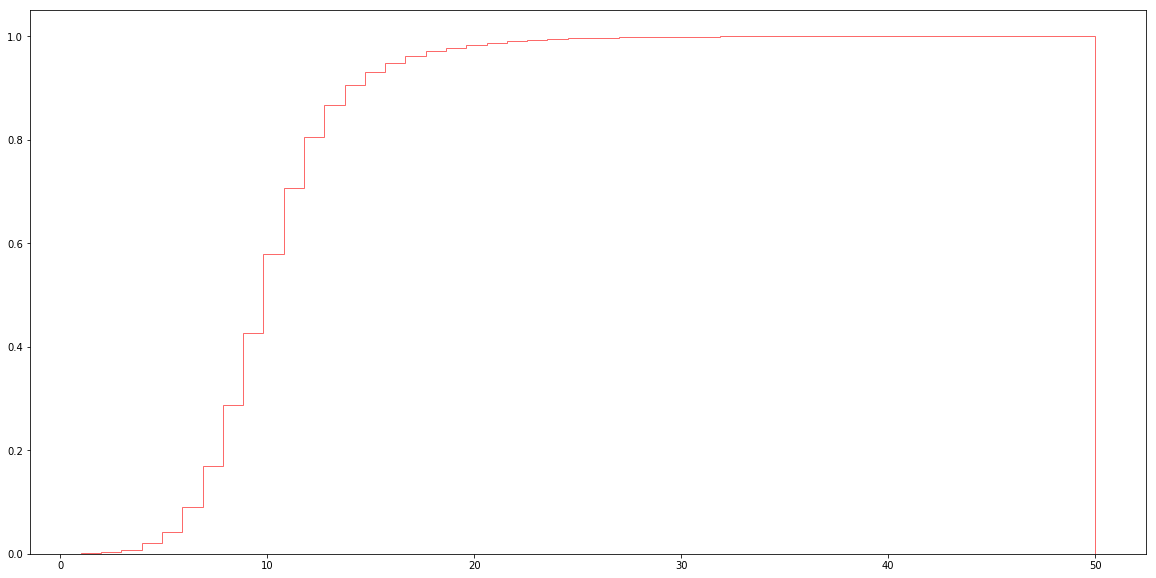

In [325]:
plt.figure(figsize=(20,10)) 
plt.hist(lengths, histtype='step', cumulative=True, density=1, color="#fc6a6a", bins=100)

plt.show()

In [239]:
len(lengths)

62276

In [240]:
df.head()

url  \
0  https://live.bible.is/bible/INDASV/1CH/10?audi...   
1  https://live.bible.is/bible/INDASV/1CH/11?audi...   
2  https://live.bible.is/bible/INDASV/1CH/12?audi...   
3  https://live.bible.is/bible/INDASV/1CH/13?audi...   
4  https://live.bible.is/bible/INDASV/1CH/14?audi...   

                                      chapter_string        audio_title  \
0  Orang Filistin berperang melawan orang Israel....  INDASV_1CH_10.mp3   
1  Lalu berkumpullah seluruh Israel kepada Daud d...  INDASV_1CH_11.mp3   
2  Inilah orang-orang yang datang kepada Daud di ...  INDASV_1CH_12.mp3   
3  Daud berunding dengan pemimpin-pemimpin pasuka...  INDASV_1CH_13.mp3   
4  Hiram, raja negeri Tirus, mengirim utusan kepa...  INDASV_1CH_14.mp3   

                                chapter_string_fixed  \
0  [orang filistin berperang melawan orang israel...   
1  [lalu berkumpullah seluruh israel kepada daud ...   
2  [inilah orang orang yang datang kepada daud di...   
3  [daud berunding dengan pemimpin pemimpin pasuk...   
4  [hiram[COMMA] raja negeri tirus[COMMA] mengiri...   

                            chapter_string_fixed_len  
0  [23, 11, 13, 11, 18, 9, 10, 8, 7, 12, 8, 13, 1...  
1  [10, 7, 10, 13, 9, 10, 11, 8, 7, 9, 11, 11, 9,...  
2  [9, 8, 10, 20, 7, 7, 8, 8, 11, 7, 7, 7, 8, 7, ...  
3  [14, 14, 18, 21, 15, 7, 10, 9, 17, 7, 9, 7, 16...  
4  [11, 12, 12, 10, 7, 9, 10, 7, 7, 13, 8, 10, 11...

In [241]:
df[df["chapter_string_fixed_len"].apply(lambda x : 30 in x)]["chapter_string_fixed"][70]

['pada waktu itu raja salomo menyuruh para tua tua israel dan semua kepala suku[COMMA]',
 'yakni para pemimpin puak orang israel[COMMA] berkumpul di hadapannya di yerusalem[COMMA]',
 'untuk mengangkut tabut perjanjian tuhan dari kota daud[COMMA]',
 'yaitu sion[DOT] maka pada hari raya di bulan etanim[COMMA]',
 'yakni bulan ketujuh[COMMA] berkumpullah di hadapan raja salomo semua orang israel[DOT]',
 'setelah semua tua tua israel datang[COMMA] maka imam imam mengangkat tabut itu[DOT]',
 'mereka mengangkut tabut tuhan dan kemah pertemuan dan segala barang kudus yang ada dalam kemah itu',
 'semuanya itu diangkut oleh imam imam dan orang orang lewi[DOT]',
 'tetapi raja salomo dan segenap umat israel yang sudah berkumpul di hadapannya[COMMA]',
 'berdiri bersama sama dengan dia di depan tabut itu[COMMA]',
 'dan mempersembahkan kambing domba dan lembu sapi yang tidak terhitung dan tidak terbilang banyaknya[DOT]',
 'kemudian imam imam membawa tabut perjanjian tuhan itu ke tempatnya[COMMA]',
 '